#### 三维情况下，球坐标系中复杂介质的走时场 及 射线追踪

In [1]:
import pyfmm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 三维情况
rarr = np.arange(20, 50, 0.2)
tarr = np.deg2rad(np.arange(-90, 90, 0.5))
parr = np.deg2rad(np.arange(0, 5, 0.5))

# 慢度场
slw  = np.ones((len(rarr), len(tarr), len(parr)), dtype='f')

# 随意添加一些异常
slw -= 0.3*np.cos(3*tarr)[None,:,None]*np.sin(5*(rarr - np.min(rarr))/(np.max(rarr) - np.min(rarr)))[:,None,None]



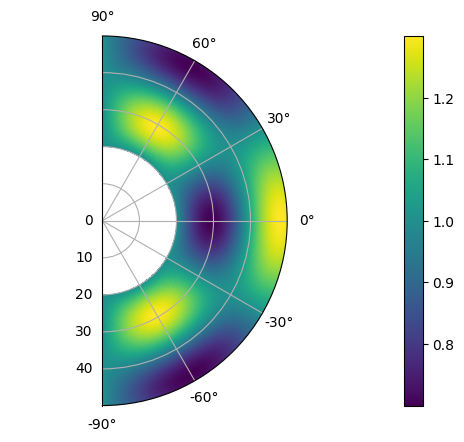

In [3]:
# 慢度分布
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
pcm = ax.pcolormesh(tarr, rarr, slw[:, :, 6])
ax.set_thetalim([-np.pi/2, np.pi/2])
ax.set_rorigin(0.0)
fig.colorbar(pcm)

In [4]:
srcloc = [45, np.deg2rad(80.0), np.deg2rad(2.0)]

# FMM解
TT = pyfmm.travel_time_source(
    srcloc,
    rarr, tarr, parr, slw, sphcoord=True)

In [5]:
# 射线追踪
rcvloc = [45, np.deg2rad(-88.0), np.deg2rad(4.0)]

travt, rays = pyfmm.raytracing(
    TT, srcloc, rcvloc, rarr, tarr, parr, 0.1, sphcoord=True)
print(f"traveltime={travt:.3f}")

traveltime=101.231


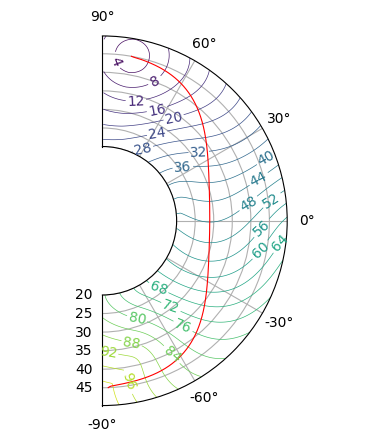

In [6]:
# 设置phi方向的索引，观察对应切片 
idx = 4
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
cs = ax.contour(tarr, rarr, TT[:, :, idx], levels=30, linewidths=0.5)
ax.set_thetalim([-np.pi/2, np.pi/2])
ax.set_rorigin(0.0)
ax.clabel(cs)

ax.plot(rays[:,1], rays[:,0], c='r', lw=0.8)
